# Convert Models in Protocol 2
We will open and resave all model objects in protocol 2, so that they can be used from python 2.
For curiosity I will compare the file size and loading speed.

In [30]:
import os
from glob import glob
from sklearn.externals import joblib
import pandas as pd
from matplotlib import pyplot as plt
from time import time

In [4]:
proj_root = os.path.abspath(os.path.join('../')) 
modeldir = os.path.join(proj_root, 'models/')
prot2dir = os.path.join(modeldir, 'prot2')

if not os.path.isdir(modeldir): os.makedirs(modeldir)
if not os.path.isdir(prot2dir): os.makedirs(prot2dir)

In [10]:
for from_file in glob(os.path.join(modeldir, '*.pkl')):
    print(os.path.basename(from_file))
    model = joblib.load(from_file)
    out_file = os.path.join(prot2dir, os.path.basename(from_file)) 
    joblib.dump(model, out_file, protocol=2)

label_nb.pkl
label_pca-mlp.pkl
caption-ja_pca-mlp-step2-full.pkl
caption-en-paren_pca-mlp-full.pkl
caption-ja-loose_pca-mlp-full.pkl
caption-en-letter_pca-mlp-full.pkl
caption-ja_pca-mlp-full.pkl
label_mlp.pkl
label_pca-mlp-full.pkl
caption-ja_pca-mlp-step1-full.pkl
label_mlp-gridbest.pkl
caption_pca-mlp-gridbest.pkl
label_mlp-full.pkl


## Compare size difference

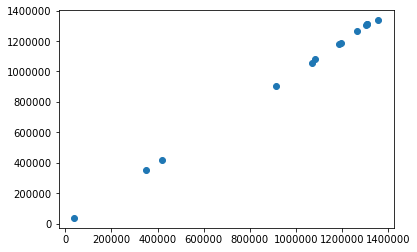

0     1.000000
1     1.002420
2     1.001634
3     1.008136
4     1.006010
5     1.011349
6     1.002568
7     1.000639
8     1.006588
9     1.002315
10    1.000439
11    1.006971
12    1.016542
dtype: float64


,file,size_prot2,size_prot3
0,label_nb.pkl,37689,37689
1,label_pca-mlp.pkl,351288,350440
2,caption-ja_pca-mlp-step2-full.pkl,1083993,1082225
3,caption-en-paren_pca-mlp-full.pkl,913379,906008
4,caption-ja-loose_pca-mlp-full.pkl,1195785,1188641
5,caption-en-letter_pca-mlp-full.pkl,1070039,1058031
6,caption-ja_pca-mlp-full.pkl,1306924,1303577
7,label_mlp.pkl,1309849,1309013
8,label_pca-mlp-full.pkl,1189239,1181456
9,caption-ja_pca-mlp-step1-full.pkl,1267055,1264129


In [45]:
data = []
for file3 in glob(os.path.join(modeldir, '*.pkl')):
    file2 = os.path.join(prot2dir, os.path.basename(file3))
    data.append({'file':os.path.basename(file3), 
                 'size_prot3':os.path.getsize(file3), 
                 'size_prot2':os.path.getsize(file2), })
data = pd.DataFrame(data)
plt.scatter(data['size_prot2'], data['size_prot3'])
plt.show()

print(data['size_prot2'] / data['size_prot3'])
data

Hmm, almost same size (up to 1.1% size difference)

## Compare load speed 

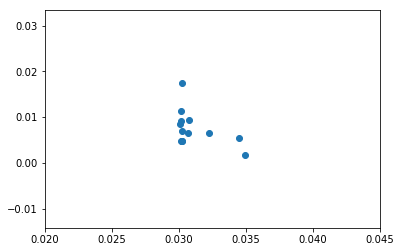

0     20.090148
1      6.358573
2      5.013941
3      3.503969
4      3.332024
5      2.676025
6      4.287869
7      6.304991
8      3.262291
9      4.696294
10     6.286437
11     6.231178
12     1.737792
dtype: float64


,file,time_prot2,time_prot3
0,label_nb.pkl,0.034909,0.001738
1,label_pca-mlp.pkl,0.034457,0.005419
2,caption-ja_pca-mlp-step2-full.pkl,0.032240,0.006430
3,caption-en-paren_pca-mlp-full.pkl,0.030097,0.008589
4,caption-ja-loose_pca-mlp-full.pkl,0.030140,0.009046
5,caption-en-letter_pca-mlp-full.pkl,0.030178,0.011277
6,caption-ja_pca-mlp-full.pkl,0.030229,0.007050
7,label_mlp.pkl,0.030179,0.004786
8,label_pca-mlp-full.pkl,0.030772,0.009433
9,caption-ja_pca-mlp-step1-full.pkl,0.030663,0.006529


In [55]:
data2 = []
for file3 in glob(os.path.join(modeldir, '*.pkl')):
    file2 = os.path.join(prot2dir, os.path.basename(from_file))
    s = time()
    joblib.load(file3)
    time3 = time()-s
    
    s = time()
    joblib.load(file2)
    time2 = time()-s
    data2.append({'file':os.path.basename(file3), 
                'time_prot3':time3, 
                'time_prot2':time2})    
data2 = pd.DataFrame(data2)

plt.scatter(data2['time_prot2'], data2['time_prot3'])
plt.show()

print(data2['time_prot2'] / data2['time_prot3'])

data2

About 3 to 5 times faster load for protocol 3!